In [155]:
import pandas as pd
import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('/Users/tylermixter/Documents/DS/All_cap.csv')
data.head(10)

,CRM All Cap Value - OMS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1252,Unnamed: 1253,Unnamed: 1254,Unnamed: 1255,Unnamed: 1256,Unnamed: 1257,Unnamed: 1258,Unnamed: 1259,Unnamed: 1260,Unnamed: 1261
0,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Weights-Sector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Security Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/29/2012 - 6/30/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,6/29/12,7/2/12,7/3/12,7/5/12,7/6/12,7/9/12,7/10/12,...,6/19/17,6/20/17,6/21/17,6/22/17,6/23/17,6/26/17,6/27/17,6/28/17,6/29/17,6/30/17
6,Ticker,NaN,NaN,Port. Weight,Port. Weight,Port. Weight,Port. Weight,Port. Weight,Port. Weight,Port. Weight,...,Port. Weight,Port. Weight,Port. Weight,Port. Weight,Port. Weight,Port. Weight,Port. Weight,Port. Weight,Port. Weight,Port. Weight
7,ABT,Abbott Laboratories,NaN,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
8,ATVI,"Activision Blizzard, Inc.",NaN,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
9,ADNT,Adient plc,NaN,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--


In [4]:
data.columns = data.iloc[5]
data.index = data.iloc[:,0]
clean_data = data.iloc[7:211,3:]
clean_data = clean_data.T
clean_data.index = pd.to_datetime(clean_data.index,infer_datetime_format=True)
clean_data.index.names = ['Dates']
clean_data.columns.names = ['Tickers']
clean_data = clean_data[clean_data.index.notnull()]
clean_data[clean_data == '--'] = 0
clean_data = clean_data.apply(pd.to_numeric)
clean_data.sort_index().head()

Tickers,ABT,ATVI,ADNT,AET,APD,ARG,AGN,AGN.2,GOOGL,AABA,...,V,VSI,VNO,VMC,WBA,WFT,WFC,WLL,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2012-06-29,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-02,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-03,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-05,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-06,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
def find_buy(list):
    return next((i for i, x in enumerate(list) if x), None)

Buy_dates = clean_data.apply(find_buy).dropna().astype('int64')
Buy_dates = pd.DataFrame(Buy_dates)
Buy_dates.rename(columns={0:'Date_index'},inplace=True)
Buy_dates['Buy_date'] = clean_data.index[Buy_dates['Date_index']]
Buy_dates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, ABT to ZTS
Data columns (total 2 columns):
Date_index    202 non-null int64
Buy_date      202 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.7+ KB


In [6]:
def find_sale(d, default=None):
    rev = (len(d) - idx for idx, item in enumerate(reversed(d), 1) if item)
    return next(rev, default)

Sell_dates = clean_data.apply(find_sale).dropna().astype('int64')
Sell_dates = pd.DataFrame(Sell_dates)
Sell_dates.rename(columns={0:'Date_index'},inplace=True)
Sell_dates['Sell_date'] = clean_data.index[Sell_dates['Date_index']]
Sell_dates.head()

,Date_index,Sell_date
Tickers,,
ABT,318,2013-10-07
ATVI,1183,2017-03-15
AET,1258,2017-06-30
APD,1258,2017-06-30
ARG,113,2012-12-12


In [7]:
Transactions = pd.concat([Buy_dates,Sell_dates],axis=1)
Transactions.drop('Date_index', axis=1, inplace=True)
Transactions.head()

,Buy_date,Sell_date
Tickers,,
ABT,2013-07-11,2013-10-07
ATVI,2016-10-04,2017-03-15
AET,2017-03-09,2017-06-30
APD,2013-08-20,2017-06-30
ARG,2012-09-14,2012-12-12


In [8]:
def nz_average(list):
    return list[list!=0].mean()

Transactions['Avg_size'] = clean_data.apply(nz_average)
Transactions['Duration'] = (Transactions['Sell_date'] - Transactions['Buy_date'])
Transactions.head()

,Buy_date,Sell_date,Avg_size,Duration
Tickers,,,,
ABT,2013-07-11,2013-10-07,1.906452,88 days
ATVI,2016-10-04,2017-03-15,1.613214,162 days
AET,2017-03-09,2017-06-30,1.970250,113 days
APD,2013-08-20,2017-06-30,2.870832,1410 days
ARG,2012-09-14,2012-12-12,1.821803,89 days


In [9]:
from pandas_datareader import data
start = clean_data.index[0]
end = clean_data.index[-1]
tickers = clean_data.columns

Prices = data.DataReader(tickers, 'yahoo', start, end)['Adj Close']
Prices.head()

/anaconda/lib/python2.7/site-packages/pandas_datareader/yahoo/daily.py:136: SymbolWarning: Failed to read symbol: 'AGN.2', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/anaconda/lib/python2.7/site-packages/pandas_datareader/yahoo/daily.py:136: SymbolWarning: Failed to read symbol: 'ATML', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/anaconda/lib/python2.7/site-packages/pandas_datareader/yahoo/daily.py:136: SymbolWarning: Failed to read symbol: 'AXLL', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/anaconda/lib/python2.7/site-packages/pandas_datareader/yahoo/daily.py:136: SymbolWarning: Failed to read symbol: 'BMC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/anaconda/lib/python2.7/site-packages/pandas_datareader/yahoo/daily.py:136: SymbolWarning: Failed to read symbol: 'BRCM', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/anaconda/lib/python2.7/site-packages/pandas_datar

,AABA,AAPL,ABT,ADNT,ADP,AEO,AEP,AET,AGN,AGN.2,...,VRNT,VSI,VSM,WBA,WFC,WFT,WLL,XLS,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-29,15.83,75.057014,27.508654,NaN,42.987484,15.719261,32.617191,36.412827,73.025581,NaN,...,29.510000,54.930000,NaN,26.540863,28.824226,12.63,41.119999,NaN,NaN,NaN
2012-07-02,15.84,76.152031,27.576923,NaN,43.064709,15.886575,33.042286,36.224995,73.854630,NaN,...,30.110001,56.070000,NaN,26.792095,28.919041,12.64,41.250000,NaN,NaN,NaN
2012-07-03,15.98,77.037544,27.662266,NaN,43.250069,15.974217,33.524582,35.830521,74.407333,NaN,...,30.270000,56.049999,NaN,26.567783,28.858702,13.02,43.580002,NaN,NaN,NaN
2012-07-05,15.85,78.390877,27.628132,NaN,43.613056,16.388508,33.549114,35.558159,74.584976,NaN,...,30.080000,56.750000,NaN,26.801071,28.557009,12.68,43.169998,NaN,NaN,NaN
2012-07-06,15.78,77.869080,27.628132,NaN,42.809845,16.261030,33.483715,35.342133,74.032272,NaN,...,29.719999,55.939999,NaN,26.576752,28.488050,12.55,41.410000,NaN,NaN,NaN


In [10]:
Prices.dropna(axis=1,inplace=True)
Prices.head()

,AABA,AAPL,ABT,ADP,AEO,AEP,AET,AGN,AIG,AIZ,...,UTX,V,VMC,VNO,VRNT,VSI,WBA,WFC,WFT,WLL
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-29,15.83,75.057014,27.508654,42.987484,15.719261,32.617191,36.412827,73.025581,30.084562,31.316195,...,66.669945,27.828691,38.832058,44.977966,29.510000,54.930000,26.540863,28.824226,12.63,41.119999
2012-07-02,15.84,76.152031,27.576923,43.064709,15.886575,33.042286,36.224995,73.854630,29.850185,31.307199,...,66.237419,28.501734,39.008083,45.251110,30.110001,56.070000,26.792095,28.919041,12.64,41.250000
2012-07-03,15.98,77.037544,27.662266,43.250069,15.974217,33.524582,35.830521,74.407333,30.365814,32.008316,...,66.864136,28.438705,39.819733,45.395718,30.270000,56.049999,26.567783,28.858702,13.02,43.580002
2012-07-05,15.85,78.390877,27.628132,43.613056,16.388508,33.549114,35.558159,74.584976,29.972061,31.442030,...,66.546371,28.589521,40.220680,45.363583,30.080000,56.750000,26.801071,28.557009,12.68,43.169998
2012-07-06,15.78,77.869080,27.628132,42.809845,16.261030,33.483715,35.342133,74.032272,29.597055,31.370121,...,65.398857,28.200104,40.210888,45.347515,29.719999,55.939999,26.576752,28.488050,12.55,41.410000


In [12]:
Stack_prices = pd.DataFrame(Prices.stack())
Buy_prices = Stack_prices.reset_index().rename(columns={'Date':'Buy_date','level_1':'Tickers',0:'Buy_price'})
Buy_prices.head()

,Buy_date,Tickers,Buy_price
0,2012-06-29,AABA,15.830000
1,2012-06-29,AAPL,75.057014
2,2012-06-29,ABT,27.508654
3,2012-06-29,ADP,42.987484
4,2012-06-29,AEO,15.719261


In [13]:
Transactions['Tickers'] = Transactions.index
Transactions.head()

,Buy_date,Sell_date,Avg_size,Duration,Tickers
Tickers,,,,,
ABT,2013-07-11,2013-10-07,1.906452,88 days,ABT
ATVI,2016-10-04,2017-03-15,1.613214,162 days,ATVI
AET,2017-03-09,2017-06-30,1.970250,113 days,AET
APD,2013-08-20,2017-06-30,2.870832,1410 days,APD
ARG,2012-09-14,2012-12-12,1.821803,89 days,ARG


In [14]:
Other = pd.merge(Transactions, Buy_prices, left_on=['Buy_date','Tickers'], right_on=['Buy_date','Tickers'],how='left')
Other.head()

,Buy_date,Sell_date,Avg_size,Duration,Tickers,Buy_price
0,2013-07-11,2013-10-07,1.906452,88 days,ABT,32.316704
1,2016-10-04,2017-03-15,1.613214,162 days,ATVI,43.861462
2,2017-03-09,2017-06-30,1.970250,113 days,AET,131.867020
3,2013-08-20,2017-06-30,2.870832,1410 days,APD,85.629044
4,2012-09-14,2012-12-12,1.821803,89 days,ARG,NaN


In [15]:
Sell_prices = Stack_prices.reset_index().rename(columns={'Date':'Sell_date','level_1':'Tickers',0:'Sell_price'})
Transactions2 = pd.merge(Other, Sell_prices, left_on=['Sell_date','Tickers'], right_on=['Sell_date','Tickers'],how='left')
Transactions2.head()

,Buy_date,Sell_date,Avg_size,Duration,Tickers,Buy_price,Sell_price
0,2013-07-11,2013-10-07,1.906452,88 days,ABT,32.316704,30.608126
1,2016-10-04,2017-03-15,1.613214,162 days,ATVI,43.861462,48.920486
2,2017-03-09,2017-06-30,1.970250,113 days,AET,131.867020,151.337173
3,2013-08-20,2017-06-30,2.870832,1410 days,APD,85.629044,143.059998
4,2012-09-14,2012-12-12,1.821803,89 days,ARG,NaN,NaN


In [16]:
Transactions2['Return'] = Transactions2['Sell_price'] / Transactions2['Buy_price'] -1
Transactions2.head()

,Buy_date,Sell_date,Avg_size,Duration,Tickers,Buy_price,Sell_price,Return
0,2013-07-11,2013-10-07,1.906452,88 days,ABT,32.316704,30.608126,-0.052870
1,2016-10-04,2017-03-15,1.613214,162 days,ATVI,43.861462,48.920486,0.115341
2,2017-03-09,2017-06-30,1.970250,113 days,AET,131.867020,151.337173,0.147650
3,2013-08-20,2017-06-30,2.870832,1410 days,APD,85.629044,143.059998,0.670695
4,2012-09-14,2012-12-12,1.821803,89 days,ARG,NaN,NaN,NaN


In [17]:
Transactions2['RoR'] = Transactions2['Return'] * 365 / (Transactions2['Duration'] / np.timedelta64(1, 'D')).astype('int64')
Transactions2.head()

,Buy_date,Sell_date,Avg_size,Duration,Tickers,Buy_price,Sell_price,Return,RoR
0,2013-07-11,2013-10-07,1.906452,88 days,ABT,32.316704,30.608126,-0.052870,-0.219290
1,2016-10-04,2017-03-15,1.613214,162 days,ATVI,43.861462,48.920486,0.115341,0.259873
2,2017-03-09,2017-06-30,1.970250,113 days,AET,131.867020,151.337173,0.147650,0.476922
3,2013-08-20,2017-06-30,2.870832,1410 days,APD,85.629044,143.059998,0.670695,0.173620
4,2012-09-14,2012-12-12,1.821803,89 days,ARG,NaN,NaN,NaN,NaN


In [18]:
Index = data.DataReader('IWN', 'yahoo', start, end)['Adj Close']
Index = pd.DataFrame(Index).reset_index()
Index.head()

,Date,Adj Close
0,2012-06-29,63.530125
1,2012-07-02,64.125793
2,2012-07-03,64.947128
3,2012-07-05,64.856865
4,2012-07-06,64.288254


In [19]:
Transactions3 = pd.merge(Transactions2, Index, left_on='Buy_date',right_on='Date',how='left')
Transactions3.rename(columns={'Adj Close':'Index_buy'},inplace=True)
Transactions3.head()

,Buy_date,Sell_date,Avg_size,Duration,Tickers,Buy_price,Sell_price,Return,RoR,Date,Index_buy
0,2013-07-11,2013-10-07,1.906452,88 days,ABT,32.316704,30.608126,-0.052870,-0.219290,2013-07-11,83.313560
1,2016-10-04,2017-03-15,1.613214,162 days,ATVI,43.861462,48.920486,0.115341,0.259873,2016-10-04,102.174538
2,2017-03-09,2017-06-30,1.970250,113 days,AET,131.867020,151.337173,0.147650,0.476922,2017-03-09,115.483742
3,2013-08-20,2017-06-30,2.870832,1410 days,APD,85.629044,143.059998,0.670695,0.173620,2013-08-20,82.221954
4,2012-09-14,2012-12-12,1.821803,89 days,ARG,NaN,NaN,NaN,NaN,2012-09-14,69.378601


In [20]:
Transactions4 = pd.merge(Transactions3, Index, left_on='Sell_date',right_on='Date',how='left')
Transactions4.rename(columns={'Adj Close':'Index_sell'},inplace=True)
Transactions4.drop(['Date_x','Date_y'],axis=1,inplace=True)

,Buy_date,Sell_date,Avg_size,Duration,Tickers,Buy_price,Sell_price,Return,RoR,Index_buy,Index_sell
0,2013-07-11,2013-10-07,1.906452,88 days,ABT,32.316704,30.608126,-0.052870,-0.219290,83.313560,84.271385
1,2016-10-04,2017-03-15,1.613214,162 days,ATVI,43.861462,48.920486,0.115341,0.259873,102.174538,117.208107
2,2017-03-09,2017-06-30,1.970250,113 days,AET,131.867020,151.337173,0.147650,0.476922,115.483742,118.229103
3,2013-08-20,2017-06-30,2.870832,1410 days,APD,85.629044,143.059998,0.670695,0.173620,82.221954,118.229103
4,2012-09-14,2012-12-12,1.821803,89 days,ARG,NaN,NaN,NaN,NaN,69.378601,67.349373


In [21]:
Transactions4['Index_return'] = Transactions4['Index_buy'] / Transactions4['Index_sell'] -1
Transactions4['Excess_return'] = Transactions4['Return'] - Transactions4['Index_return']

,Buy_date,Sell_date,Avg_size,Duration,Tickers,Buy_price,Sell_price,Return,RoR,Index_buy,Index_sell,Index_return
0,2013-07-11,2013-10-07,1.906452,88 days,ABT,32.316704,30.608126,-0.052870,-0.219290,83.313560,84.271385,-0.011366
1,2016-10-04,2017-03-15,1.613214,162 days,ATVI,43.861462,48.920486,0.115341,0.259873,102.174538,117.208107,-0.128264
2,2017-03-09,2017-06-30,1.970250,113 days,AET,131.867020,151.337173,0.147650,0.476922,115.483742,118.229103,-0.023221
3,2013-08-20,2017-06-30,2.870832,1410 days,APD,85.629044,143.059998,0.670695,0.173620,82.221954,118.229103,-0.304554
4,2012-09-14,2012-12-12,1.821803,89 days,ARG,NaN,NaN,NaN,NaN,69.378601,67.349373,0.030130


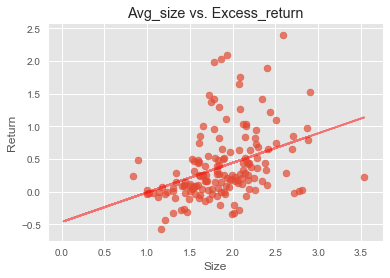

In [23]:
x = Transactions4['Avg_size']
y = Transactions4['Excess_return']
idx = np.isfinite(x) & np.isfinite(y)

fig, ax = plt.subplots()
fit = np.polyfit(x[idx], y[idx], deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red', alpha=0.5)
ax.scatter(x, y, alpha=0.7)

plt.title('Avg_size vs. Excess_return')
plt.xlabel('Size')
plt.ylabel('Return')
plt.show()

In [24]:
PT = pd.read_csv('/Users/tylermixter/Documents/DS/PT_Data.csv')
PT = PT.loc[1:, ~PT.columns.str.startswith('Drop')]
PT.head()

,Date,Tickers,Analyst,Down_PT,EBIT0,EBIT1,EBIT2,EBIT-1,EBITDA0,EBITDA1,...,Cash,Debt,Yield,Price,Shares,Rev0,Rev1,Rev2,Rev-1,UP_PT
1,5/11/17,PINC,Jeff Reich,30,452.384798,505.254413,552.615504,394.6768105,506.584798,549.254413,...,219,328,0,33,142,1441.519826,1639.081397,1773.855507,1162.323176,44
2,5/11/17,AGN,Jeff Reich,192,7625.144423,8308.727335,9235.677015,7250.4,7795.144423,8478.727335,...,10000,31500,NaN,233,356,15853.82353,17089.57054,18528.03175,14570.6,270
3,5/9/17,HLT,Jason Yellin,49.4515,NaN,NaN,1511.521356,NaN,1691,1800.566604,...,862,6629,NaN,63.05,330.3333333,NaN,NaN,NaN,NaN,70.0149
4,5/9/17,PINC,Jeff Reich,30,452.384798,505.254413,552.615504,394.6768105,506.584798,549.254413,...,219,328,0,33,142,1441.519826,1639.081397,1773.855507,1162.323176,44
5,5/8/17,PINC,Jeff Reich,30,452.384798,505.254413,552.615504,394.6768105,506.584798,549.254413,...,219,328,0,33,142,1441.519826,1639.081397,1773.855507,1162.323176,44


In [25]:
df = PT.apply(pd.to_numeric, errors='ignore')
df['Date'] = pd.to_datetime(df['Date'])
df['Net_debt'] = df['Debt'] - df['Cash'] 
df['Leverage'] = df['Net_debt'] / df['EBITDA1']
df['Market_cap'] = df['Price'] * df['Shares']
df['P/E'] = df['Price'] / df['EPS2']
df['Ent_value'] = df['Net_debt'] + df['Market_cap']
df['EBITDA_mult'] = df['Ent_value'] / df ['EBITDA2']
df['Upside'] = df['UP_PT'] / df['Price'] -1
df['Downside'] = df['Down_PT'] / df['Price'] -1
df['Risk_Reward'] = df['Upside'] / abs(df['Downside'])
df['Growth'] = df['Rev2'] / df['Rev0']

,Date,Tickers,Analyst,Down_PT,EBIT0,EBIT1,EBIT2,EBIT-1,EBITDA0,EBITDA1,...,Cash,Debt,Yield,Price,Shares,Rev0,Rev1,Rev2,Rev-1,UP_PT
1,2017-05-11,PINC,Jeff Reich,30.0000,452.384798,505.254413,552.615504,394.67681,506.584798,549.254413,...,219.0,328.0,0.0,33.00,142.000000,1441.519826,1639.081397,1773.855507,1162.323176,44.0000
2,2017-05-11,AGN,Jeff Reich,192.0000,7625.144423,8308.727335,9235.677015,7250.40000,7795.144423,8478.727335,...,10000.0,31500.0,NaN,233.00,356.000000,15853.823530,17089.570540,18528.031750,14570.600000,270.0000
3,2017-05-09,HLT,Jason Yellin,49.4515,NaN,NaN,1511.521356,NaN,1691.000000,1800.566604,...,862.0,6629.0,NaN,63.05,330.333333,NaN,NaN,NaN,NaN,70.0149
4,2017-05-09,PINC,Jeff Reich,30.0000,452.384798,505.254413,552.615504,394.67681,506.584798,549.254413,...,219.0,328.0,0.0,33.00,142.000000,1441.519826,1639.081397,1773.855507,1162.323176,44.0000
5,2017-05-08,PINC,Jeff Reich,30.0000,452.384798,505.254413,552.615504,394.67681,506.584798,549.254413,...,219.0,328.0,0.0,33.00,142.000000,1441.519826,1639.081397,1773.855507,1162.323176,44.0000


In [27]:
df2 = pd.merge(df, Transactions4[['Tickers','Buy_date']], on='Tickers', how='left')
df2['dif'] = abs(df2['Date'] - df2['Buy_date'])
df2 = df2[df2['dif'].notnull()]
df3 = df2.sort_values('dif',ascending=True).groupby('Tickers').first().reset_index()
df4 = pd.merge(df3, Transactions4, on='Tickers', how='left')

,Date,Tickers,Analyst,Down_PT,EBIT0,EBIT1,EBIT2,EBIT-1,EBITDA0,EBITDA1,...,Leverage,Market_cap,P/E,Ent_value,EBITDA_mult,Upside,Downside,Risk_Reward,Growth,Buy_date
0,2017-05-11,PINC,Jeff Reich,30.0000,452.384798,505.254413,552.615504,394.67681,506.584798,549.254413,...,0.198451,4686.000000,14.061102,4795.000000,8.037002,0.333333,-0.090909,3.666667,1.230545,NaT
1,2017-05-11,AGN,Jeff Reich,192.0000,7625.144423,8308.727335,9235.677015,7250.40000,7795.144423,8478.727335,...,2.535758,82948.000000,11.024397,104448.000000,11.104783,0.158798,-0.175966,0.902439,1.168679,2015-11-10
2,2017-05-09,HLT,Jason Yellin,49.4515,NaN,NaN,1511.521356,NaN,1691.000000,1800.566604,...,3.202881,20827.516665,24.585689,26594.516665,14.164695,0.110466,-0.215678,0.512181,NaN,NaT
3,2017-05-09,PINC,Jeff Reich,30.0000,452.384798,505.254413,552.615504,394.67681,506.584798,549.254413,...,0.198451,4686.000000,14.061102,4795.000000,8.037002,0.333333,-0.090909,3.666667,1.230545,NaT
4,2017-05-08,PINC,Jeff Reich,30.0000,452.384798,505.254413,552.615504,394.67681,506.584798,549.254413,...,0.198451,4686.000000,14.061102,4795.000000,8.037002,0.333333,-0.090909,3.666667,1.230545,NaT


,Date,Tickers,Analyst,Down_PT,EBIT0,EBIT1,EBIT2,EBIT-1,EBITDA0,EBITDA1,...,Market_cap,P/E,Ent_value,EBITDA_mult,Upside,Downside,Risk_Reward,Growth,Buy_date,dif
1,2017-05-11,AGN,Jeff Reich,192.0,7625.144423,8308.727335,9235.677015,7250.4,7795.144423,8478.727335,...,82948.0,11.024397,104448.0,11.104783,0.158798,-0.175966,0.902439,1.168679,2015-11-10,548 days
5,2017-05-08,WFC,Brian Harvey,50.0,NaN,NaN,NaN,NaN,NaN,NaN,...,274818.5,11.953663,NaN,NaN,0.163636,-0.090909,1.800000,1.079248,2015-09-11,605 days
6,2017-05-05,ZTS,Jeff Reich,50.0,1848.474449,2106.174234,2296.458543,1562.0,1990.474449,2246.174234,...,24750.0,16.726883,27839.0,11.426010,0.240000,0.000000,inf,1.152896,2013-06-21,1414 days
13,2017-05-03,QGEN,Jeff Reich,20.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-06-10,327 days
17,2017-05-01,ZION,Bernie Frojmovich,36.0,NaN,NaN,NaN,NaN,NaN,NaN,...,8331.2,14.074837,NaN,NaN,0.195122,-0.121951,1.600000,1.172438,2017-05-24,23 days


,Tickers,Date,Analyst,Down_PT,EBIT0,EBIT1,EBIT2,EBIT-1,EBITDA0,EBITDA1,...,Market_cap,P/E,Ent_value,EBITDA_mult,Upside,Downside,Risk_Reward,Growth,Buy_date,dif
0,AAPL,2014-03-24,Jonathan Ruch,445.4838,48999.000000,52626.895190,54026.459300,55241.000000,55756.000000,59633.895190,...,486784.080000,11.208226,344903.080000,5.627996,0.244444,-0.175030,1.396586,1.106271,2014-03-24,0 days
1,ABT,2013-07-10,Tom DeBourcy,31.0000,4182.575522,4662.495967,4976.772264,3724.996316,5825.899522,6331.191687,...,55114.125500,13.896665,53699.238500,8.048929,0.237410,-0.107914,2.200000,1.108157,2013-07-11,1 days
2,ADP,2012-08-01,Jonathan Ruch,48.9042,2030.824192,2163.419852,2247.391320,1901.250000,2292.574192,2413.419852,...,27473.600000,17.830988,25911.900000,10.375587,0.082300,-0.126711,0.649511,1.114339,2012-06-29,33 days
3,AEO,2012-08-02,Madeleine Morris,17.5000,257.866000,451.477174,502.886772,317.261000,401.022000,589.768453,...,3920.000000,12.145503,3198.400000,4.968321,0.250000,-0.125000,2.000000,1.118048,2012-07-17,16 days
4,AEP,2016-02-03,Tyler Mixter,54.0000,3484.629724,3720.078694,3920.039020,3232.000000,5496.279686,5642.271184,...,30865.092061,16.031957,50675.092061,8.572424,0.098551,-0.140264,0.702611,1.117882,2016-02-02,1 days


count    191.000000
mean            inf
std             NaN
min       -0.083333
25%        1.150538
50%        1.567865
75%        2.454907
max             inf
Name: Risk_Reward, dtype: float64

In [148]:
factors = ['P/E','EBITDA_mult','Risk_Reward','Leverage','Growth']

In [161]:
df5 = df4[['Tickers','Excess_return','P/E','EBITDA_mult','Risk_Reward','Leverage','Growth']]
df5.head()

,Tickers,Excess_return,P/E,EBITDA_mult,Risk_Reward,Leverage,Growth
0,AAPL,0.497674,11.208226,5.627996,1.396586,-2.379201,1.106271
1,ABT,-0.041504,13.896665,8.048929,2.200000,-0.223479,1.108157
2,ADP,0.724053,17.830988,10.375587,0.649511,-0.647090,1.114339
3,AEO,-0.037771,12.145503,4.968321,2.000000,-1.223531,1.118048
4,AEP,0.287234,16.031957,8.572424,0.702611,3.510997,1.117882


In [176]:
df5 = df5.replace([np.inf, -np.inf], np.nan).dropna(axis=0, how='any')
df6 = df5[(np.abs(stats.zscore(df5[factors])) < 3).all(axis=1)]

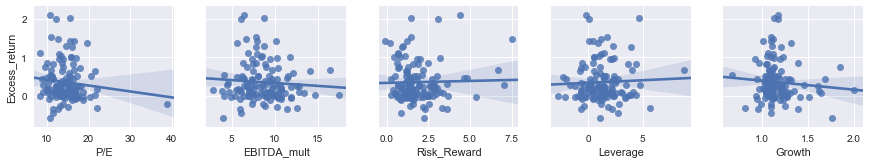

In [216]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.pairplot(df6, x_vars=factors, y_vars=['Excess_return'], kind='reg')

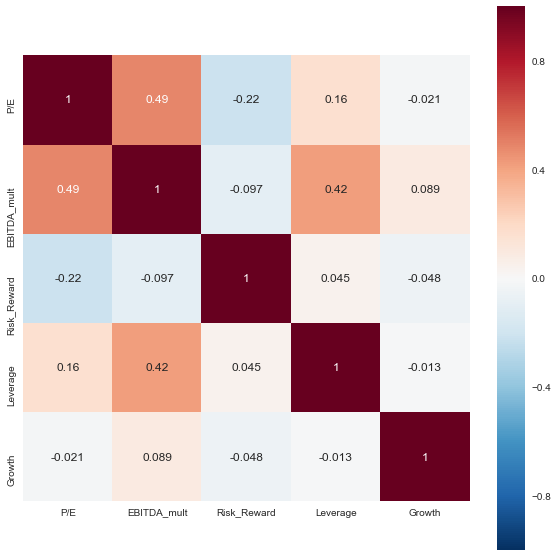

In [166]:
plt.figure(figsize=(10,10))
sns.heatmap(df6[factors].corr(), square=True, annot=True, annot_kws={'size': 12});

In [182]:
df7 = df6.copy()
df7[factors] = df7[factors].apply(lambda x: (x-x.mean())/(x.std()))
df7.head()

,Tickers,Excess_return,P/E,EBITDA_mult,Risk_Reward,Leverage,Growth
0,AAPL,0.497674,-0.846032,-1.165098,-0.358716,-2.125480,-0.301745
1,ABT,-0.041504,-0.122248,-0.216181,0.263680,-0.862646,-0.291529
2,ADP,0.724053,0.936953,0.695784,-0.937467,-1.110800,-0.258054
3,AEO,-0.037771,-0.593697,-1.423666,0.108742,-1.448482,-0.237971
4,AEP,0.287234,0.452617,-0.010990,-0.896331,1.325031,-0.238871


In [184]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import feature_selection

lm_sk = LinearRegression()
X = df7[factors]
y = df7['Excess_return']

lm_sk.fit(X,y)
print "coefficients:", lm_sk.coef_
print "intercept:", lm_sk.intercept_
print "r2:", lm_sk.score(X,y)
print feature_selection.f_regression(X, y)[1]

coefficients: [-0.05274335 -0.02729667 -0.00487624  0.0422012  -0.04137285]
intercept: 0.351491429263
r2: 0.0266568060154
[ 0.20394477  0.39156508  0.77409148  0.61748271  0.341282  ]


In [217]:
def binarize(num):
    return 1 if num >0 else 0

df7['Good'] = df7['Excess_return'].apply(binarize)

126

In [208]:
from sklearn.ensemble import RandomForestClassifier
y_bin = df7['Good']

model = RandomForestClassifier(n_estimators = 20)
model.fit(X, y_bin)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [209]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
2,Risk_Reward,0.209297
0,P/E,0.206140
3,Leverage,0.204301
4,Growth,0.201093
1,EBITDA_mult,0.179169


CV AUC [ 0.55757576  0.53535354  0.51215278], Average AUC 0.535027356902
n trees: 1, CV AUC [ 0.49393939  0.49494949  0.40625   ], Average AUC 0.465046296296
n trees: 11, CV AUC [ 0.53787879  0.4023569   0.54166667], Average AUC 0.493967452301
n trees: 21, CV AUC [ 0.56060606  0.51515152  0.49305556], Average AUC 0.522937710438
n trees: 31, CV AUC [ 0.60151515  0.42424242  0.44965278], Average AUC 0.491803451178
n trees: 41, CV AUC [ 0.59545455  0.45286195  0.52951389], Average AUC 0.525943462402
n trees: 51, CV AUC [ 0.58333333  0.48989899  0.56597222], Average AUC 0.546401515152
n trees: 61, CV AUC [ 0.58787879  0.53872054  0.50347222], Average AUC 0.543357182941
n trees: 71, CV AUC [ 0.59545455  0.43265993  0.45833333], Average AUC 0.495482603816
n trees: 81, CV AUC [ 0.6030303   0.50841751  0.55381944], Average AUC 0.555089085297
n trees: 91, CV AUC [ 0.56212121  0.54040404  0.515625  ], Average AUC 0.539383417508


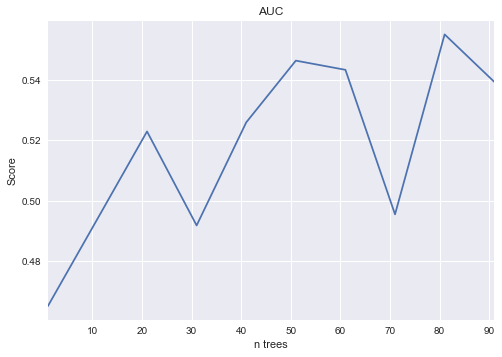

In [214]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X, y_bin, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

auc_scores = {}
for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y_bin, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))
    auc_scores[n_trees] = scores.mean()
ax = pd.Series(auc_scores, name='AUC Scores').plot(title='AUC');

ax.set_xlabel('n trees')
ax.set_ylabel('Score')